<a href="https://colab.research.google.com/github/junaiskv94/Bike-SHaring-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
#loading the data
df= pd.read_csv('/content/drive/MyDrive/capstone_project/EDA-2/Copy of SeoulBikeData.csv',encoding='cp1252')

**Preliminary Data Inspection**

In [76]:
# Looking the first five rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [77]:
# Looking for  number of rows and columns 

df.shape

(8760, 14)

8760 rows and 14 colums

In [78]:
# look for data type and checking any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [79]:
# Check for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No missing values and data contains numerical and categorical features

In [80]:
# Checking the numerical values
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [81]:
# Numerical features
Numerical_var=df.describe().columns.to_list()
Numerical_var

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [82]:
# Categorical features
categorical_var=list(set(df.columns.to_list())-set(df.describe().columns.to_list()))
categorical_var

['Holiday', 'Seasons', 'Date', 'Functioning Day']

In [83]:
# Change the feature(column) names
df.rename(columns = {'Rented Bike Count':'Bike_Count'}, inplace = True)
df.rename(columns = {'Rainfall(mm)':'Rainfall'}, inplace = True)
df.rename(columns = {'Temperature(°C)':'Temperature'}, inplace = True)
df.rename(columns = {'Humidity(%)':'Humidity'}, inplace = True)
df.rename(columns = {'Wind speed (m/s)':'Wind_Speed'}, inplace = True)
df.rename(columns = {'Visibility (10m)':'Visibility'}, inplace = True)
df.rename(columns = {'Solar Radiation (MJ/m2)':'Solar_Radiation'}, inplace = True)
df.rename(columns = {'Snowfall (cm)':'Snowfall'}, inplace = True)
df.rename(columns = {'Functioning Day':'Functioning_Day'}, inplace = True)

In [84]:
# Add a new column for Month in the dataFrame
df['Month']=pd.DatetimeIndex(df['Date']).month

In [85]:
# convert the hour & month feture in to cateogorical datatype
cols=['Hour','Month',]
for col in cols:
  df[col]=df[col].astype('object')

In [86]:
# check the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Bike_Count                 8760 non-null   int64  
 2   Hour                       8760 non-null   object 
 3   Temperature                8760 non-null   float64
 4   Humidity                   8760 non-null   int64  
 5   Wind_Speed                 8760 non-null   float64
 6   Visibility                 8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar_Radiation            8760 non-null   float64
 9   Rainfall                   8760 non-null   float64
 10  Snowfall                   8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning_Day            8760 non-null   objec

In [87]:
# Numerical features
Numerical_var=df.describe().columns.to_list()
Numerical_var

['Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_Speed',
 'Visibility',
 'Dew point temperature(°C)',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

In [88]:
# Categorical features
categorical_var=list(set(df.columns.to_list())-set(df.describe().columns.to_list()))
categorical_var

['Hour', 'Seasons', 'Functioning_Day', 'Holiday', 'Date', 'Month']

In [89]:
df.head()

,Date,Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew point temperature(°C),Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


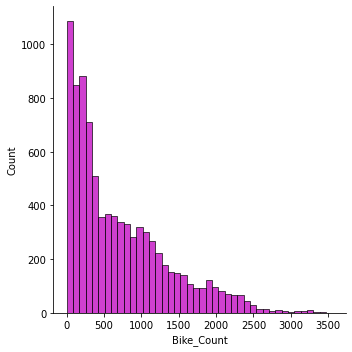

In [90]:
# Plot the dependenr variable 'Bike_count'
ax=sns.displot((df['Bike_Count']), color="m")
plt.show()

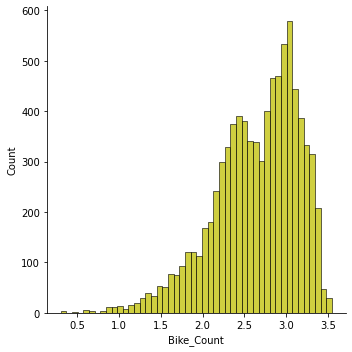

In [91]:
ax=sns.displot(np.log10(df['Bike_Count']), color="y")
plt.show()

Still skewed after log transformation

In [92]:
# Check for skew in data
df['Bike_Count'].sort_values(ascending=False)

4818    3556
4866    3418
4650    3404
4842    3384
4458    3380
        ... 
3158       0
7376       0
3157       0
7288       0
7234       0
Name: Bike_Count, Length: 8760, dtype: int64

In [22]:
np.log10(df['Bike_Count']).describe()

count    8760.000000
mean            -inf
std              NaN
min             -inf
25%         2.281033
50%         2.702861
75%         3.027452
max         3.550962
Name: Bike_Count, dtype: float64

Better to do a Square Root Transform to avoid the infinity values

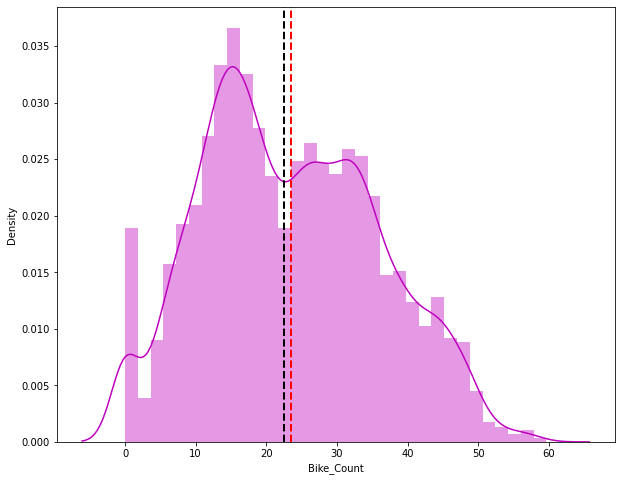

In [23]:
#Apply square root to Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Bike_Count']), color="m")
ax.axvline(np.sqrt(df['Bike_Count']).mean(), color='r', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

The distribution after square root transformttion is much better

In [24]:
# Apply square root transformation on 'Bike Count'.
df['Bike_Count'] = np.sqrt(df['Bike_Count'])

In [25]:
df.head()

,Date,Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew point temperature(°C),Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month
0,01/12/2017,15.937377,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,01/12/2017,14.282857,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,01/12/2017,13.152946,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,01/12/2017,10.344080,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,01/12/2017,8.831761,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


**Exploratory Data Analysis & Data Preparation**

**Distribution vs Hour,Month,Holiday,Season**\
Looking how bike count varies across these cateogorical data

In [93]:
# Removing date from cateogorical list
categorical_var.remove('Date')


In [94]:
categorical_var

['Hour', 'Seasons', 'Functioning_Day', 'Holiday', 'Month']

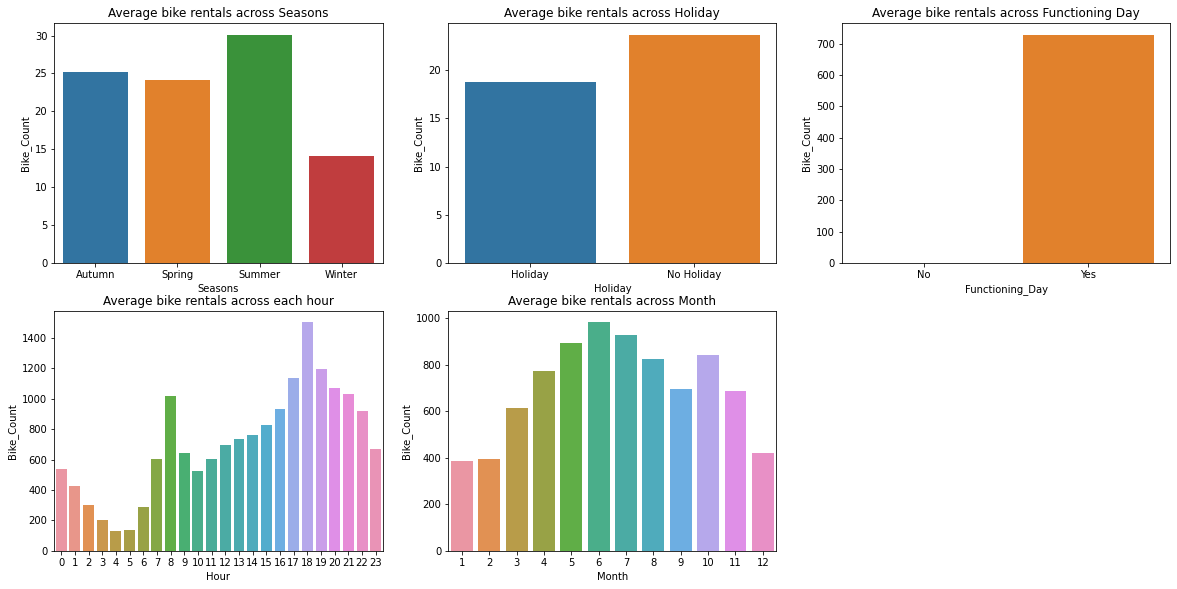

In [111]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(20, 15))
axes = fig.add_subplot(3, 3, 1)
Bike_season=df.groupby(['Seasons'])['Bike_Count'].mean().reset_index()
sns.barplot(data=y,x='Seasons', y='Bike_Count', ax=axes)
axes.set(xlabel='Seasons', ylabel='Bike_Count', title='Average bike rentals across Seasons')

axes = fig.add_subplot(3, 3, 2)
Bike_season = pd.DataFrame(df.groupby(['Holiday'])['Bike_Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Holiday', y='Bike_Count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Bike_Count', title='Average bike rentals across Holiday')

axes = fig.add_subplot(3, 3, 3)
Bike_Functioning_Day =pd.DataFrame(df.groupby(['Functioning_Day'])['Bike_Count'].mean()).reset_index()
sns.barplot(data=Bike_Functioning_Day, x='Functioning_Day', y='Bike_Count', ax=axes)
axes.set(xlabel='Functioning_Day', ylabel='Bike_Count', title='Average bike rentals across Functioning Day')


axes = fig.add_subplot(3, 3, 4)
Bike_Functioning_Day =pd.DataFrame(df.groupby(['Hour'])['Bike_Count'].mean()).reset_index()
sns.barplot(data=Bike_Functioning_Day, x='Hour', y='Bike_Count', ax=axes)
axes.set(xlabel='Hour', ylabel='Bike_Count', title='Average bike rentals across each hour')

axes = fig.add_subplot(3, 3, 5)
Bike_Functioning_Day =pd.DataFrame(df.groupby(['Month'])['Bike_Count'].mean()).reset_index()
sns.barplot(data=Bike_Functioning_Day, x='Month', y='Bike_Count', ax=axes)
axes.set(xlabel='Month', ylabel='Bike_Count', title='Average bike rentals across Month')


plt.show()




**Inferenece:**


*   The peak requirement for bikes are during the start and end of office hours
*  The Bikes are most used in Summers and Least used during winters
*  On holidays the demand is not that as much as that on Working days
*  The demand is more during evening compared to morning
*The Demand for bikes are less during the start and end of the year and the demand grows till June and then shows a decrfeasing trend


*  There is no bike rent  in  non functioning day








seaborn boxplots to get an idea of the distribution and outliers acorss various categorical features

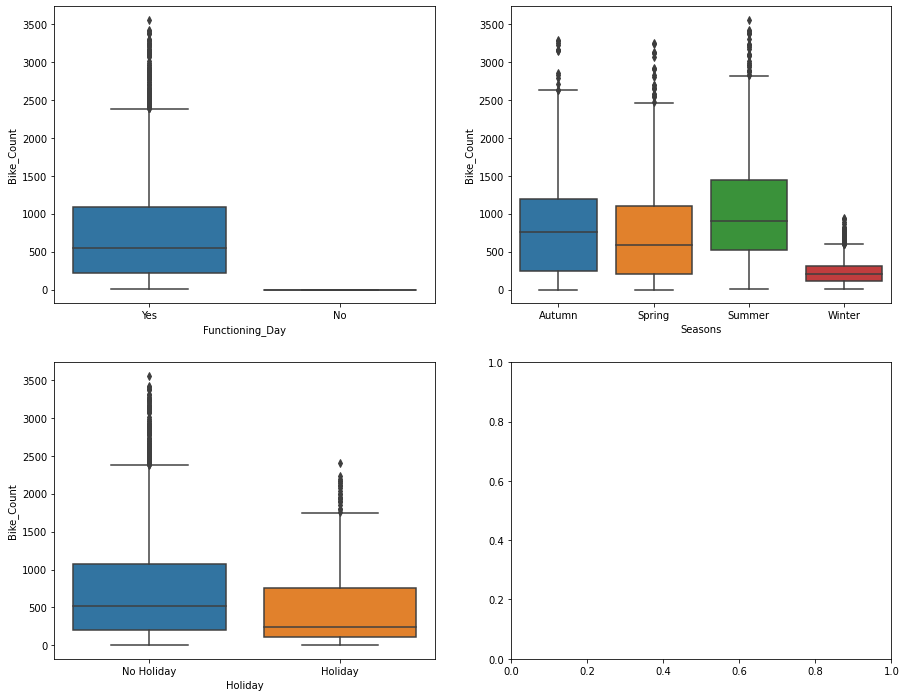

In [110]:
# Seaborn boxplots to get an idea of the distribution/outliers
f, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(data=df, y='Bike_Count', x='Functioning_Day', ax=axes[0][0])
hue_order= ['Autumn', 'Spring', 'Summer', 'Winter']
sns.boxplot(data=df, y='Bike_Count', x='Seasons', ax=axes[0][1], order=hue_order)
sns.boxplot(data=df, y='Bike_Count', x='Holiday', ax=axes[1][0])

plt.show() 

**Inference**


*   Bike reservations are lesser in Winter season compared to Summer and Autumn
*   Bike reservation are lesser on holidays
*  There is no rental on non functioning days
 









